In [46]:
# Dependencies 
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
survey_path = "./data/(Original)kaggle_survey_17_20_v2.csv"


# Import the CSV into a pandas DataFrame

survey_df = pd.read_csv(survey_path)

# Display the data table for preview
survey_df

/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_72319/1226878581.py:16: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_df = pd.read_csv(survey_path)


,index,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Money Spent,Year
0,0,35-39,Male,Colombia,Doctoral degree,Student,NaN,NaN,NaN,NaN,NaN,2020
1,1,30-34,Male,United States of America,Master’s degree,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",2020
2,2,35-39,Male,Argentina,Bachelor’s degree,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),"10,001-20,000",$0 ($USD),2020
3,3,30-34,Male,United States of America,Master’s degree,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",2020
4,4,30-34,Male,Japan,Master’s degree,Software Engineer,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
80322,80322,22-24,Female,Other,Master’s degree,NaN,NaN,NaN,NaN,Cant Disclose,NaN,2017
80323,80323,25-29,Male,Indonesia,Bachelor’s degree,Programmer,0-49 employees,NaN,NaN,Cant Disclose,NaN,2017
80324,80324,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,Cant Disclose,NaN,2017
80325,80325,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,Cant Disclose,NaN,2017


In [2]:
#Drop NaValues
reduced_df= survey_df.dropna()

In [3]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22820 entries, 1 to 39752
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 22820 non-null  int64 
 1   Age                   22820 non-null  object
 2   Gender                22820 non-null  object
 3   Country               22820 non-null  object
 4   Degree                22820 non-null  object
 5   Job Title             22820 non-null  object
 6   Company Size          22820 non-null  object
 7   Team Size             22820 non-null  object
 8   ML Status in Company  22820 non-null  object
 9   Compensation Status   22820 non-null  object
 10  Money Spent           22820 non-null  object
 11  Year                  22820 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


In [4]:
reduced_df.keys()

Index(['index', 'Age', 'Gender', 'Country', 'Degree', 'Job Title',
       'Company Size', 'Team Size', 'ML Status in Company',
       'Compensation Status', 'Money Spent', 'Year'],
      dtype='object')

In [5]:
#Delete column that we do not need. Clean dataset 
del reduced_df['index']
del reduced_df['Money Spent']

In [6]:
reduced_df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Year
1,30-34,Male,United States of America,Master’s degree,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999",2020
2,35-39,Male,Argentina,Bachelor’s degree,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),"10,001-20,000",2020
3,30-34,Male,United States of America,Master’s degree,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999",2020
8,35-39,Male,Germany,Doctoral degree,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","70,000-79,999",2020
11,35-39,Male,United States of America,Doctoral degree,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,"30,000-39,999",2020
...,...,...,...,...,...,...,...,...,...,...
39736,22-24,Male,Other,Bachelor’s degree,Software Engineer,0-49 employees,0,No (we do not use ML methods),"0-10,000",2019
39738,18-21,Male,India,Doctoral degree,Data Scientist,0-49 employees,0,We use ML methods for generating insights (but...,"0-10,000",2019
39739,22-24,Male,India,Bachelor’s degree,Data Scientist,50-249 employees,3-4,We use ML methods for generating insights (but...,"0-10,000",2019
39749,18-21,Male,India,Bachelor’s degree,Other,250-999 employees,3-4,I do not know,"0-10,000",2019


In [7]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22820 entries, 1 to 39752
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   22820 non-null  object
 1   Gender                22820 non-null  object
 2   Country               22820 non-null  object
 3   Degree                22820 non-null  object
 4   Job Title             22820 non-null  object
 5   Company Size          22820 non-null  object
 6   Team Size             22820 non-null  object
 7   ML Status in Company  22820 non-null  object
 8   Compensation Status   22820 non-null  object
 9   Year                  22820 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 1.9+ MB


In [8]:
#Clean dataset. Remove the unknown country
reduced_df = reduced_df.loc[reduced_df['Country']!= "Other"]
reduced_df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Year
1,30-34,Male,United States of America,Master’s degree,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999",2020
2,35-39,Male,Argentina,Bachelor’s degree,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),"10,001-20,000",2020
3,30-34,Male,United States of America,Master’s degree,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999",2020
8,35-39,Male,Germany,Doctoral degree,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","70,000-79,999",2020
11,35-39,Male,United States of America,Doctoral degree,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,"30,000-39,999",2020
...,...,...,...,...,...,...,...,...,...,...
39733,25-29,Male,India,Professional degree,Software Engineer,"10,000 or more employees",20+,I do not know,"0-10,000",2019
39738,18-21,Male,India,Doctoral degree,Data Scientist,0-49 employees,0,We use ML methods for generating insights (but...,"0-10,000",2019
39739,22-24,Male,India,Bachelor’s degree,Data Scientist,50-249 employees,3-4,We use ML methods for generating insights (but...,"0-10,000",2019
39749,18-21,Male,India,Bachelor’s degree,Other,250-999 employees,3-4,I do not know,"0-10,000",2019


In [9]:
#Remove the unknown ML Status in Company for a cleaner dataset
reduced_df= reduced_df.loc[reduced_df['ML Status in Company'] != "I do not know"]
reduced_df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Year
1,30-34,Male,United States of America,Master’s degree,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999",2020
2,35-39,Male,Argentina,Bachelor’s degree,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),"10,001-20,000",2020
3,30-34,Male,United States of America,Master’s degree,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999",2020
8,35-39,Male,Germany,Doctoral degree,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","70,000-79,999",2020
11,35-39,Male,United States of America,Doctoral degree,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,"30,000-39,999",2020
...,...,...,...,...,...,...,...,...,...,...
39726,25-29,Male,Australia,Bachelor’s degree,Other,"1000-9,999 employees",5-9,No (we do not use ML methods),"60,000-69,999",2019
39730,22-24,Female,India,Bachelor’s degree,Software Engineer,"10,000 or more employees",1-2,No (we do not use ML methods),"0-10,000",2019
39738,18-21,Male,India,Doctoral degree,Data Scientist,0-49 employees,0,We use ML methods for generating insights (but...,"0-10,000",2019
39739,22-24,Male,India,Bachelor’s degree,Data Scientist,50-249 employees,3-4,We use ML methods for generating insights (but...,"0-10,000",2019


In [10]:
#Remove unknown job tittles 
reduced_df = reduced_df.loc[reduced_df['Job Title'] != "Other"]
reduced_df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Year
1,30-34,Male,United States of America,Master’s degree,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999",2020
2,35-39,Male,Argentina,Bachelor’s degree,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),"10,001-20,000",2020
3,30-34,Male,United States of America,Master’s degree,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999",2020
8,35-39,Male,Germany,Doctoral degree,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","70,000-79,999",2020
11,35-39,Male,United States of America,Doctoral degree,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,"30,000-39,999",2020
...,...,...,...,...,...,...,...,...,...,...
39720,30-34,Male,China,Master’s degree,Data Analyst,250-999 employees,3-4,"We recently started using ML methods (i.e., mo...","0-10,000",2019
39730,22-24,Female,India,Bachelor’s degree,Software Engineer,"10,000 or more employees",1-2,No (we do not use ML methods),"0-10,000",2019
39738,18-21,Male,India,Doctoral degree,Data Scientist,0-49 employees,0,We use ML methods for generating insights (but...,"0-10,000",2019
39739,22-24,Male,India,Bachelor’s degree,Data Scientist,50-249 employees,3-4,We use ML methods for generating insights (but...,"0-10,000",2019


In [11]:
#Replace the degree keywords 
reduced_df['Degree'] = reduced_df['Degree'].replace({"Master’s degree" : "Master", "Bachelor’s degree" : "Bachelor", 
                                                    "Doctoral degree" : "Doctoral"})
reduced_df

/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_72319/2353267988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Degree'] = reduced_df['Degree'].replace({"Master’s degree" : "Master", "Bachelor’s degree" : "Bachelor",


,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Year
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999",2020
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),"10,001-20,000",2020
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999",2020
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","70,000-79,999",2020
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,"30,000-39,999",2020
...,...,...,...,...,...,...,...,...,...,...
39720,30-34,Male,China,Master,Data Analyst,250-999 employees,3-4,"We recently started using ML methods (i.e., mo...","0-10,000",2019
39730,22-24,Female,India,Bachelor,Software Engineer,"10,000 or more employees",1-2,No (we do not use ML methods),"0-10,000",2019
39738,18-21,Male,India,Doctoral,Data Scientist,0-49 employees,0,We use ML methods for generating insights (but...,"0-10,000",2019
39739,22-24,Male,India,Bachelor,Data Scientist,50-249 employees,3-4,We use ML methods for generating insights (but...,"0-10,000",2019


In [12]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16803 entries, 1 to 39752
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   16803 non-null  object
 1   Gender                16803 non-null  object
 2   Country               16803 non-null  object
 3   Degree                16803 non-null  object
 4   Job Title             16803 non-null  object
 5   Company Size          16803 non-null  object
 6   Team Size             16803 non-null  object
 7   ML Status in Company  16803 non-null  object
 8   Compensation Status   16803 non-null  object
 9   Year                  16803 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [13]:
# Split the Compenstation Status into 2 columns 
new = reduced_df["Compensation Status"].str.split("-", n = 1, expand = True)
reduced_df["Min_Salary"]= new[0]
reduced_df["Max_Salary"]= new[1]
# Dropping old Name columns
reduced_df.drop(columns =["Compensation Status"], inplace = True)
# df display
reduced_df.head(9)

/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_72319/670570551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["Min_Salary"]= new[0]
/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_72319/670570551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["Max_Salary"]= new[1]
/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_72319/670570551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",2020,"100,000","124,999"
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),2020,"10,001","20,000"
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...",2020,"125,000","149,999"
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...",2020,"70,000","79,999"
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,2020,"30,000","39,999"
13,30-34,Male,Canada,Bachelor,Data Engineer,0-49 employees,3-4,We are exploring ML methods (and may one day p...,2020,"90,000","99,999"
20,22-24,Female,India,Doctoral,Statistician,50-249 employees,1-2,We are exploring ML methods (and may one day p...,2020,0,"10,000"
21,30-34,Male,Russia,Bachelor,Data Scientist,50-249 employees,1-2,No (we do not use ML methods),2020,0,"10,000"
22,55-59,Female,Canada,Master,Product/Project Manager,250-999 employees,5-9,"We recently started using ML methods (i.e., mo...",2020,"125,000","149,999"


In [14]:
reduced_df= reduced_df.loc[reduced_df['Min_Salary'] != "0"]
reduced_df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",2020,"100,000","124,999"
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),2020,"10,001","20,000"
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...",2020,"125,000","149,999"
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...",2020,"70,000","79,999"
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,2020,"30,000","39,999"
...,...,...,...,...,...,...,...,...,...,...,...
39625,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,2019,"70,000","79,999"
39639,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,No (we do not use ML methods),2019,"30,000","39,999"
39690,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,"We have well established ML methods (i.e., mod...",2019,"30,000","39,999"
39699,25-29,Male,China,I prefer not to answer,Data Engineer,250-999 employees,5-9,"We recently started using ML methods (i.e., mo...",2019,"20,001","30,000"


In [15]:
reduced_df['Min_Salary'].value_counts()

10,001        1809
20,001        1283
100,000       1046
40,000         960
50,000         950
30,000         948
60,000         733
70,000         709
125,000        643
150,000        636
90,000         521
80,000         513
200,000        209
300,000         95
> $500,000      89
250,000         82
Name: Min_Salary, dtype: int64

In [16]:
# Replace some of the value counts in Min and Max column in order to change the type from string to float 
reduced_df['Min_Salary'] = reduced_df['Min_Salary'].replace({"> $500,000" : "500,000 "})
reduced_df['Min_Salary'].value_counts()

/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_72319/3625082720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Min_Salary'] = reduced_df['Min_Salary'].replace({"> $500,000" : "500,000 "})


10,001      1809
20,001      1283
100,000     1046
40,000       960
50,000       950
30,000       948
60,000       733
70,000       709
125,000      643
150,000      636
90,000       521
80,000       513
200,000      209
300,000       95
500,000       89
250,000       82
Name: Min_Salary, dtype: int64

In [17]:
#Convert the Min salary from string to float 
cleaned_df = reduced_df.copy()
cleaned_df['Min_Salary'] = cleaned_df['Min_Salary'].apply(lambda x: x.replace('$', '').replace(',','') 
                                                      if isinstance (x,str) else x).astype(float)

cleaned_df


,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",2020,100000.0,"124,999"
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),2020,10001.0,"20,000"
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...",2020,125000.0,"149,999"
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...",2020,70000.0,"79,999"
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,2020,30000.0,"39,999"
...,...,...,...,...,...,...,...,...,...,...,...
39625,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,2019,70000.0,"79,999"
39639,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,No (we do not use ML methods),2019,30000.0,"39,999"
39690,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,"We have well established ML methods (i.e., mod...",2019,30000.0,"39,999"
39699,25-29,Male,China,I prefer not to answer,Data Engineer,250-999 employees,5-9,"We recently started using ML methods (i.e., mo...",2019,20001.0,"30,000"


In [18]:
df = cleaned_df.copy()
df['Max_Salary'] = df['Max_Salary'].apply(lambda x: x.replace('$', '').replace(',','') 
                                                      if isinstance (x,str) else x).astype(float)
df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",2020,100000.0,124999.0
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),2020,10001.0,20000.0
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...",2020,125000.0,149999.0
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...",2020,70000.0,79999.0
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,2020,30000.0,39999.0
...,...,...,...,...,...,...,...,...,...,...,...
39625,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,2019,70000.0,79999.0
39639,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,No (we do not use ML methods),2019,30000.0,39999.0
39690,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,"We have well established ML methods (i.e., mod...",2019,30000.0,39999.0
39699,25-29,Male,China,I prefer not to answer,Data Engineer,250-999 employees,5-9,"We recently started using ML methods (i.e., mo...",2019,20001.0,30000.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11226 entries, 1 to 39752
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   11226 non-null  object 
 1   Gender                11226 non-null  object 
 2   Country               11226 non-null  object 
 3   Degree                11226 non-null  object 
 4   Job Title             11226 non-null  object 
 5   Company Size          11226 non-null  object 
 6   Team Size             11226 non-null  object 
 7   ML Status in Company  11226 non-null  object 
 8   Year                  11226 non-null  int64  
 9   Min_Salary            11226 non-null  float64
 10  Max_Salary            11137 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.0+ MB


In [20]:
#Convert the Min salary from string to float 
df = df.loc[df['Degree'] != "I prefer not to answer"]
df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",2020,100000.0,124999.0
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),2020,10001.0,20000.0
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...",2020,125000.0,149999.0
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...",2020,70000.0,79999.0
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,2020,30000.0,39999.0
...,...,...,...,...,...,...,...,...,...,...,...
39624,35-39,Male,India,Bachelor,Software Engineer,"10,000 or more employees",5-9,"We have well established ML methods (i.e., mod...",2019,20001.0,30000.0
39625,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,2019,70000.0,79999.0
39639,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,No (we do not use ML methods),2019,30000.0,39999.0
39690,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,"We have well established ML methods (i.e., mod...",2019,30000.0,39999.0


In [21]:
df.Gender.value_counts()

Male                       9562
Female                     1397
Prefer not to say           129
Prefer to self-describe      16
Nonbinary                    12
Name: Gender, dtype: int64

In [22]:
#Clean up the Gender 
df = df.loc[df['Gender'] != "Prefer not to say"]
df = df.loc[df['Gender'] != "Prefer to self-describe"]
df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",2020,100000.0,124999.0
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),2020,10001.0,20000.0
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...",2020,125000.0,149999.0
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...",2020,70000.0,79999.0
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,2020,30000.0,39999.0
...,...,...,...,...,...,...,...,...,...,...,...
39624,35-39,Male,India,Bachelor,Software Engineer,"10,000 or more employees",5-9,"We have well established ML methods (i.e., mod...",2019,20001.0,30000.0
39625,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,2019,70000.0,79999.0
39639,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,No (we do not use ML methods),2019,30000.0,39999.0
39690,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,"We have well established ML methods (i.e., mod...",2019,30000.0,39999.0


In [23]:
df['ML Status in Company'].value_counts()

We have well established ML methods (i.e., models in production for more than 2 years)       2964
We recently started using ML methods (i.e., models in production for less than 2 years)      2620
We are exploring ML methods (and may one day put a model into production)                    2345
No (we do not use ML methods)                                                                1565
We use ML methods for generating insights (but do not put working models into production)    1477
Name: ML Status in Company, dtype: int64

In [24]:
df['ML Status in Company'] = df['ML Status in Company'].replace({
    "We have well established ML methods (i.e., models in production for more than 2 years)" : "Well-establised", 
    "We recently started using ML methods (i.e., models in production for less than 2 years)" : "Recently-started", 
                                                    "We are exploring ML methods (and may one day put a model into production)" : "Exploring",
"No (we do not use ML methods)": "Never", 
"We use ML methods for generating insights (but do not put working models into production)": "Others"})
df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
1,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,Well-establised,2020,100000.0,124999.0
2,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,Never,2020,10001.0,20000.0
3,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,Well-establised,2020,125000.0,149999.0
8,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,Well-establised,2020,70000.0,79999.0
11,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,Others,2020,30000.0,39999.0
...,...,...,...,...,...,...,...,...,...,...,...
39624,35-39,Male,India,Bachelor,Software Engineer,"10,000 or more employees",5-9,Well-establised,2019,20001.0,30000.0
39625,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,Exploring,2019,70000.0,79999.0
39639,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,Never,2019,30000.0,39999.0
39690,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,Well-establised,2019,30000.0,39999.0


In [25]:
#Reset index
new_df = df.reset_index(drop=True)
new_df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
0,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,Well-establised,2020,100000.0,124999.0
1,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,Never,2020,10001.0,20000.0
2,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,Well-establised,2020,125000.0,149999.0
3,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,Well-establised,2020,70000.0,79999.0
4,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,Others,2020,30000.0,39999.0
...,...,...,...,...,...,...,...,...,...,...,...
10966,35-39,Male,India,Bachelor,Software Engineer,"10,000 or more employees",5-9,Well-establised,2019,20001.0,30000.0
10967,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,Exploring,2019,70000.0,79999.0
10968,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,Never,2019,30000.0,39999.0
10969,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,Well-establised,2019,30000.0,39999.0


In [28]:
# Job tittle Salary 
grouped_job_titles = new_df.set_index('Job Title').groupby(['Job Title'])
job_count = new_df['Job Title'].value_counts()

# Calculate the average min and max starting salary
average_min_starting_salary= grouped_job_titles['Min_Salary'].mean()
average_max_starting_salary= grouped_job_titles['Max_Salary'].mean()

#Degree Summary display 
job_summary = pd.DataFrame({ "Total counts": job_count,
                               "Average Minimum starting Salary" : average_min_starting_salary, 
                               "Average Maximum starting Salary" : average_max_starting_salary
                          })
job_summary

,Total counts,Average Minimum starting Salary,Average Maximum starting Salary
Business Analyst,679,57099.005891,67347.035661
DBA/Database Engineer,124,64234.104839,76869.162602
Data Analyst,1230,52142.589431,64425.211726
Data Engineer,558,70430.365591,80117.666667
Data Scientist,3881,73921.907240,89450.040769
Machine Learning Engineer,381,69829.666667,88275.597368
Product/Project Manager,834,74808.359712,90427.960145
Research Scientist,1175,67319.417021,79573.291738
Software Engineer,1893,60787.466984,74321.177128
Statistician,216,76713.212963,87782.292453


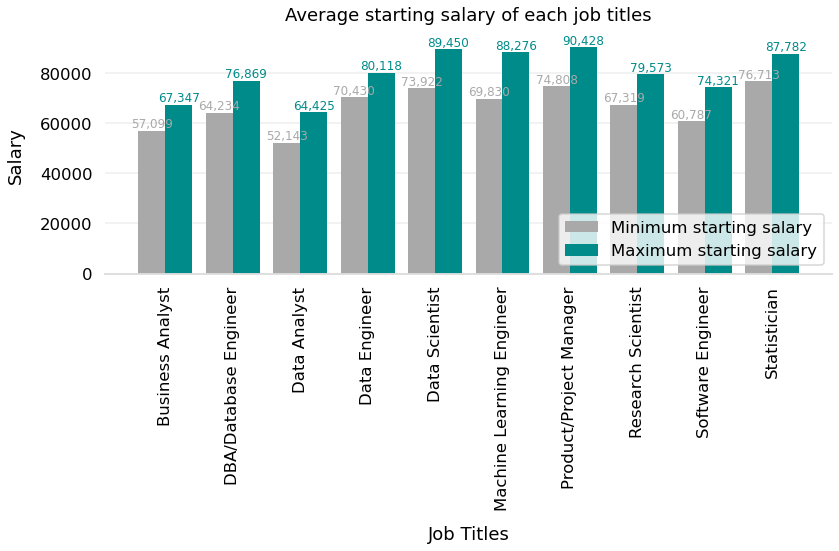

In [44]:
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and min and max starting salary as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(12, 8))
labels = job_summary.index.values
min_salary = job_summary['Average Minimum starting Salary']
MAX_SALARY = job_summary['Average Maximum starting Salary']
# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

x = np.arange(len(labels))  # the label locations
b1 = ax.bar(x, job_summary['Average Minimum starting Salary'],
            width=bar_width, label='Minimum starting salary', color = 'darkgrey')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, job_summary['Average Maximum starting Salary'], color = 'darkcyan',
            width=bar_width, label='Maximum starting salary')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labels, rotation = 90)

# Add legend.
ax.legend(loc = 'lower right')

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Job Titles', labelpad=15)
ax.set_ylabel('Salary', labelpad=15)
ax.set_title('Average starting salary of each job titles', pad=15)
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = round(bar.get_height())
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
fig.tight_layout()